In [10]:
# Step 0: Set working directory (optional)
import os
os.chdir("D:/ACP")  # Adjust path as needed
print("Current Working Directory:", os.getcwd())

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    accuracy_score, roc_curve, auc
)
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt

# Step 2: Load training and testing datasets
train_data = pd.read_csv("acp_train_data.csv")
test_data = pd.read_csv("acp_test_data.csv")

# Step 3: Extract features and labels
y_train = train_data.iloc[:, 2]
X_train = train_data.iloc[:, 3:]
y_test = test_data.iloc[:, 2]
X_test = test_data.iloc[:, 3:]

# Step 4: Set up hyperparameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9], #odd numbers 1-30
    'weights': ['uniform', 'distance'], #uniform or distance
    'metric': ['minkowski', 'manhattan'], #euclidian , manhattan, minkowski
    'p': [1, 2], # power parameter for minkowski
    'algorithm': ['auto', 'brute'] #auto', 'ball_tree', 'kd_tree', 'brute'
}
# Step 5: Grid Search with Cross-Validation
knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy', n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

# Step 6: Get the best model
best_knn_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Save best hyperparameters to a file
with open('best_model_info_knn.txt', 'w') as f:
    f.write("Best Hyperparameters:\n")
    for param, value in grid_search.best_params_.items():
        f.write(f"{param}: {value}\n")

print("Best model information has been saved to 'best_model_info_knn.txt'")



Current Working Directory: D:\ACP
Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END algorithm=auto, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.6s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.6s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.6s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.6s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.6s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.6s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.6s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.6s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.6s
[CV] END 

In [11]:
#save best model to a file
joblib.dump(best_knn_model, "best_knn_model.pkl")

# Step 8: Fit the model on the training data
best_knn_model.fit(X_train, y_train)

# Evaluate on the test dataset
y_test_pred = best_knn_model.predict(X_test)
y_test_prob = best_knn_model.predict_proba(X_test)[:, 1]

# Calculate and print accuracy, classification reports, and confusion matrices
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"knn Test Accuracy: {test_accuracy * 100:.2f}%")

# Confusion Matrices
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Data):\n", confusion_matrix_test)

# Sensitivity and Specificity calculation
def calculate_sensitivity_specificity(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

sensitivity_test, specificity_test = calculate_sensitivity_specificity(confusion_matrix_test)
print("Test Data - Sensitivity:", sensitivity_test, "Specificity:", specificity_test)

knn Test Accuracy: 72.43%
Confusion Matrix (Test Data):
 [[58 33]
 [18 76]]
Test Data - Sensitivity: 0.8085106382978723 Specificity: 0.6373626373626373


In [12]:
print("Confusion Matrix (Test Data):")
print(f"TN: {confusion_matrix_test[0,0]}  FP: {confusion_matrix_test[0,1]}")
print(f"FN: {confusion_matrix_test[1,0]}  TP: {confusion_matrix_test[1,1]}")
from sklearn.metrics import f1_score

# calculation of F1 score
f1_test = f1_score(y_test, y_test_pred)
print("F1 Score (Test Data):", f1_test)

#calculation of classification report for test and evaluation data
print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))

# Evaluate on the test dataset
y_test_pred = best_knn_model.predict(X_test)
y_test_prob = best_knn_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
# Compute metrics
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient (MCC):", mcc)

Confusion Matrix (Test Data):
TN: 58  FP: 33
FN: 18  TP: 76
F1 Score (Test Data): 0.7487684729064039
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.76      0.64      0.69        91
           1       0.70      0.81      0.75        94

    accuracy                           0.72       185
   macro avg       0.73      0.72      0.72       185
weighted avg       0.73      0.72      0.72       185

Precision: 0.6972477064220184
Recall: 0.8085106382978723
F1 Score: 0.7487684729064039
Matthews Correlation Coefficient (MCC): 0.4530811776284105


Test Data ROC AUC: 0.8255786766425064
Test Data FPR: [0.         0.02197802 0.15384615 0.36263736 0.54945055 0.75824176
 1.        ]
Test Data TPR: [0.         0.45744681 0.65957447 0.80851064 0.89361702 0.9787234
 1.        ]
Test Data Thresholds: [inf 1.  0.8 0.6 0.4 0.2 0. ]
ROC curve saved as 'knn_roc_auc_curve.png'.


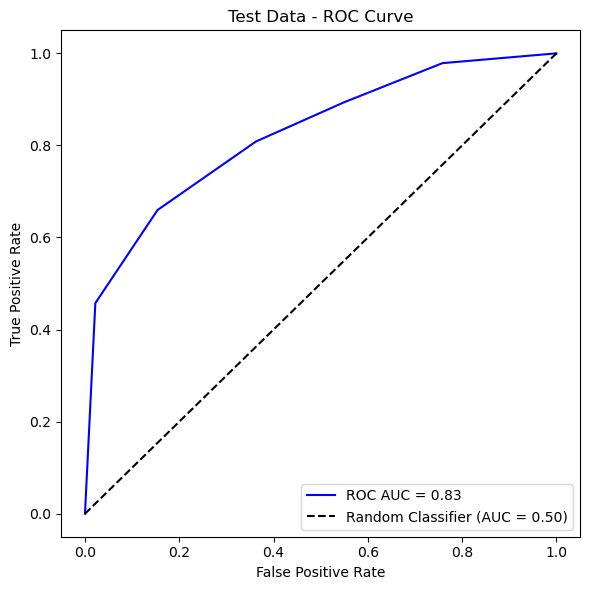

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate ROC for test dataset
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Print the values
print("Test Data ROC AUC:", roc_auc_test)
print("Test Data FPR:", fpr_test)
print("Test Data TPR:", tpr_test)
print("Test Data Thresholds:", thresholds_test)

# Create a plot
fig, ax = plt.subplots(figsize=(6, 6))  # This defines 'ax' properly

# Plot ROC curve
ax.plot(fpr_test, tpr_test, label=f"ROC AUC = {roc_auc_test:.2f}", color="blue")
ax.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.50)")
ax.set_title("Test Data - ROC Curve")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="lower right")

# Adjust layout and save figure
plt.tight_layout()
plt.savefig("knn_roc_auc_curve.png", dpi=500)
print("ROC curve saved as 'knn_roc_auc_curve.png'.")

# Show the plot
plt.show()


In [14]:
from sklearn.model_selection import cross_val_score
# Perform 10-fold cross-validation on the best model
cross_val_scores = cross_val_score(best_knn_model, X_train, y_train, cv=10, scoring='accuracy')
print("10-Fold Cross-Validation Accuracy Scores:", cross_val_scores)
print("Mean 10-Fold CV Accuracy:", cross_val_scores.mean())

# save accuracy of each fold to a text file
with open('cv_accuracies_knn.txt', 'w') as f:
    f.write("Cross-Validation Accuracies for each fold:\n")
    for i, score in enumerate(cross_val_scores):
        f.write(f"Fold {i+1} Accuracy: {score:.4f}\n")

print("Accuracy of each fold has been saved to 'cv_accuracies_knn.txt'")

10-Fold Cross-Validation Accuracy Scores: [0.75675676 0.81081081 0.72972973 0.77027027 0.78378378 0.7027027
 0.72972973 0.72972973 0.73972603 0.73972603]
Mean 10-Fold CV Accuracy: 0.7492965568308034
Accuracy of each fold has been saved to 'cv_accuracies_knn.txt'


Mean Accuracy: 74.93
Mean AUC: 0.9188


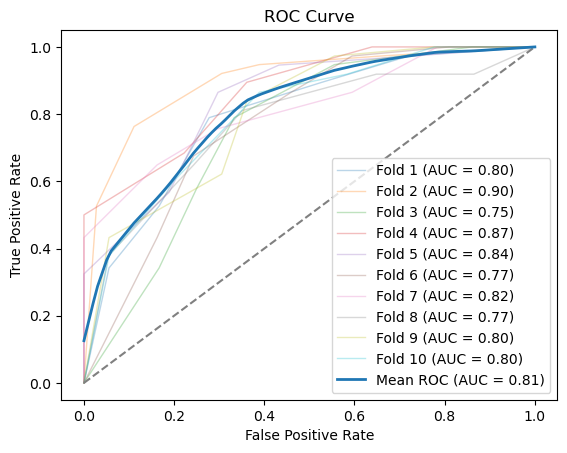

In [15]:
# make roc curve of all folds with mean auc and mean accuracy printed on the plot
mean_accuracy = cross_val_scores.mean() * 100
print(f"Mean Accuracy: {mean_accuracy:.2f}")
# Step 6: Generate ROC Curve
mean_auc = roc_auc_score(y_train, best_knn_model.predict_proba(X_train)[:, 1])
print(f"Mean AUC: {mean_auc:.4f}")

cv = StratifiedKFold(n_splits=10)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
for i, (train_idx, test_idx) in enumerate(cv.split(X_train, y_train)):
    best_knn_model.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    y_prob = best_knn_model.predict_proba(X_train.iloc[test_idx])[:, 1]
    fpr, tpr, _ = roc_curve(y_train.iloc[test_idx], y_prob)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig("cv_roc_curve_knn.png", dpi=500)
plt.show()